# DINA Analysis 1: Heart Rate vs. Time

Ioana Lupascu

In [202]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from datetime import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# STEP 1: Load the dataset

In [203]:
heart = pd.read_csv('Gillian_2021-03-16_16-30-43.csv')
heart.columns

Index(['Name', 'Sport', 'Date', 'Start time', 'Duration',
       'Total distance (mi)', 'Average heart rate (bpm)',
       'Average speed (mi/h)', 'Max speed (mi/h)', 'Average pace (min/mi)',
       'Max pace (min/mi)', 'Calories', 'Fat percentage of calories(%)',
       'Average cadence (rpm)', 'Average stride length (in)', 'Running index',
       'Training load', 'Ascent (ft)', 'Descent (ft)', 'Average power (W)',
       'Max power (W)', 'Notes', 'Height (ft in)', 'Weight (lbs)', 'HR max',
       'HR sit', 'VO2max'],
      dtype='object')

Shape, Size, etc:

In [204]:
n = heart.nunique(axis=0)
n

Name                                3
Sport                            3856
Date                               48
Start time                          2
Duration                            2
Total distance (mi)                 1
Average heart rate (bpm)            2
Average speed (mi/h)                1
Max speed (mi/h)                    1
Average pace (min/mi)               1
Max pace (min/mi)                   1
Calories                            1
Fat percentage of calories(%)       1
Average cadence (rpm)               0
Average stride length (in)          0
Running index                       0
Training load                       0
Ascent (ft)                         0
Descent (ft)                        0
Average power (W)                   0
Max power (W)                       0
Notes                               0
Height (ft in)                      1
Weight (lbs)                        1
HR max                              1
HR sit                              0
VO2max      

In [205]:
heart.head()

,Name,Sport,Date,Start time,Duration,Total distance (mi),Average heart rate (bpm),Average speed (mi/h),Max speed (mi/h),Average pace (min/mi),...,Ascent (ft),Descent (ft),Average power (W),Max power (W),Notes,Height (ft in),Weight (lbs),HR max,HR sit,VO2max
0,Farakh Zaman,YOGA,16-03-2021,16:30:43,1:04:12,NaN,81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5 8,183.0,183.0,NaN,46.0
1,Sample rate,Time,HR (bpm),Speed (mi/h),Pace (min/mi),Cadence,Altitude (ft),Stride length (in),Distances (ft),Temperatures (F),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0:00:00,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0:00:01,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0:00:02,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping the First 2 Rows

In [206]:
heart2 = heart.drop([0, 1])
heart2.head()

,Name,Sport,Date,Start time,Duration,Total distance (mi),Average heart rate (bpm),Average speed (mi/h),Max speed (mi/h),Average pace (min/mi),...,Ascent (ft),Descent (ft),Average power (W),Max power (W),Notes,Height (ft in),Weight (lbs),HR max,HR sit,VO2max
2,1,0:00:00,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0:00:01,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0:00:02,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0:00:03,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0:00:04,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reimporting without Index, to allow for changing column indexes to Row 3 Labels

In [209]:
df = pd.read_csv('Gillian_2021-03-16_16-30-43.csv', header = None)
df2 = df.drop([0, 1])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
2,Sample rate,Time,HR (bpm),Speed (mi/h),Pace (min/mi),Cadence,Altitude (ft),Stride length (in),Distances (ft),Temperatures (F),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0:00:00,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0:00:01,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0:00:02,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0:00:03,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Reindex after dropped columns

In [210]:
indcol = df2.iloc[0,:]
indcol

0            Sample rate
1                   Time
2               HR (bpm)
3           Speed (mi/h)
4          Pace (min/mi)
5                Cadence
6          Altitude (ft)
7     Stride length (in)
8         Distances (ft)
9       Temperatures (F)
10             Power (W)
11                   NaN
12                   NaN
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                   NaN
23                   NaN
24                   NaN
25                   NaN
26                   NaN
Name: 2, dtype: object

In [211]:
df2.columns = indcol.values


df3 = df2.iloc[1:,1:3]
df3


,Time,HR (bpm)
3,0:00:00,98
4,0:00:01,99
5,0:00:02,99
6,0:00:03,99
7,0:00:04,100
...,...,...
3852,1:04:09,89
3853,1:04:10,89
3854,1:04:11,89
3855,1:04:12,89


In [256]:
df3.describe()

,Time,HR (bpm)
count,3854,3854
unique,3854,46
top,0:15:45,78
freq,1,293


In [213]:
df4 = df3.rename(index=str, columns={"HR (bpm)": "HR"})

In [214]:
df4

,Time,HR
3,0:00:00,98
4,0:00:01,99
5,0:00:02,99
6,0:00:03,99
7,0:00:04,100
...,...,...
3852,1:04:09,89
3853,1:04:10,89
3854,1:04:11,89
3855,1:04:12,89


In [257]:
df4.describe()

,HR
count,3854.000000
mean,80.571354
std,15.277415
min,0.000000
25%,76.000000
50%,80.000000
75%,87.000000
max,109.000000


In [233]:
df5 = df4.dropna(axis='columns')

In [259]:
hr2 = df4['HR'].dropna()

In [260]:
hr2.describe()

count    3854.000000
mean       80.571354
std        15.277415
min         0.000000
25%        76.000000
50%        80.000000
75%        87.000000
max       109.000000
Name: HR, dtype: float64

# Changing Time to datetime format
# Chnaging Heart Rate to numeric, for analysis

In [218]:
df4['Time'] = pd.to_datetime(df4['Time'])

In [240]:
df4['HR'] = pd.to_numeric(df4['HR'])

In [245]:
df4.describe()

,HR
count,3854.000000
mean,80.571354
std,15.277415
min,0.000000
25%,76.000000
50%,80.000000
75%,87.000000
max,109.000000


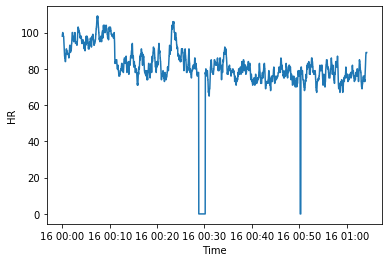

In [244]:
sns.lineplot(x=df4['Time'], y = df4['HR'])

In [241]:
df4.head()

,Time,HR
3,2021-03-16 00:00:00,98
4,2021-03-16 00:00:01,99
5,2021-03-16 00:00:02,99
6,2021-03-16 00:00:03,99
7,2021-03-16 00:00:04,100


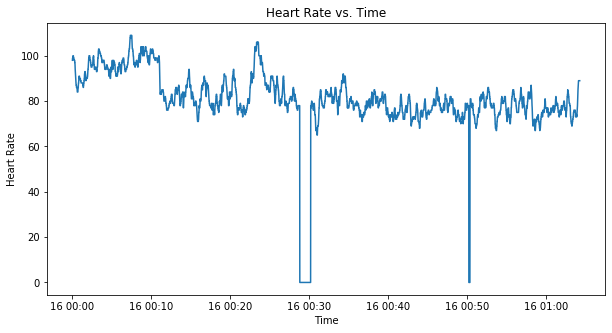

In [255]:
plt.figure(figsize = [10,5])
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate vs. Time')
plt.plot(df4['Time'], df4['HR'])